In [ ]:
# Database and data manipulation
import sqlite3
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="darkgrid")  # Set a clean style for Seaborn
plt.rcParams["figure.figsize"] = (10, 6)  # Set default figure size

# Suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore")

  Category  TotalSales
0  Spirits    60430.71
1     Beer    58121.05
2     Wine    34107.46


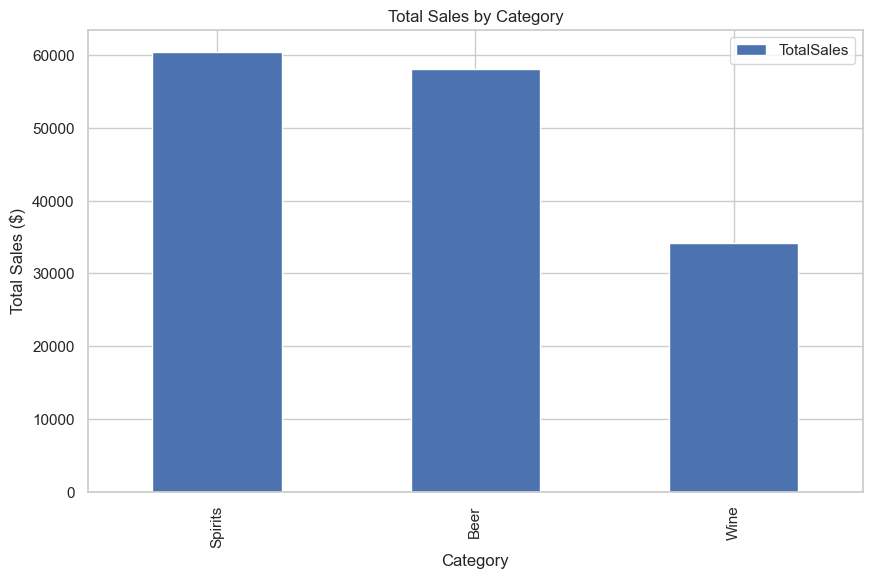

In [12]:
# Query: Total sales by category
query = """
SELECT p.Category, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
JOIN Products p ON s.ProductID = p.ProductID
GROUP BY p.Category
ORDER BY TotalSales DESC
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df = pd.read_sql_query(query, conn)

# Display the results
print(df)

# Visualize the results
df.plot(kind="bar", x="Category", y="TotalSales", title="Total Sales by Category")
plt.ylabel("Total Sales ($)")
plt.show()

      Month  TotalSales
0   2024-05     7146.80
1   2024-06    11859.51
2   2024-07    13970.81
3   2024-08    16996.69
4   2024-09    12077.27
5   2024-10     6335.59
6   2024-11    16702.63
7   2024-12    12796.91
8   2025-01    10328.44
9   2025-02    12427.64
10  2025-03    13601.28
11  2025-04    14573.88
12  2025-05     3841.77


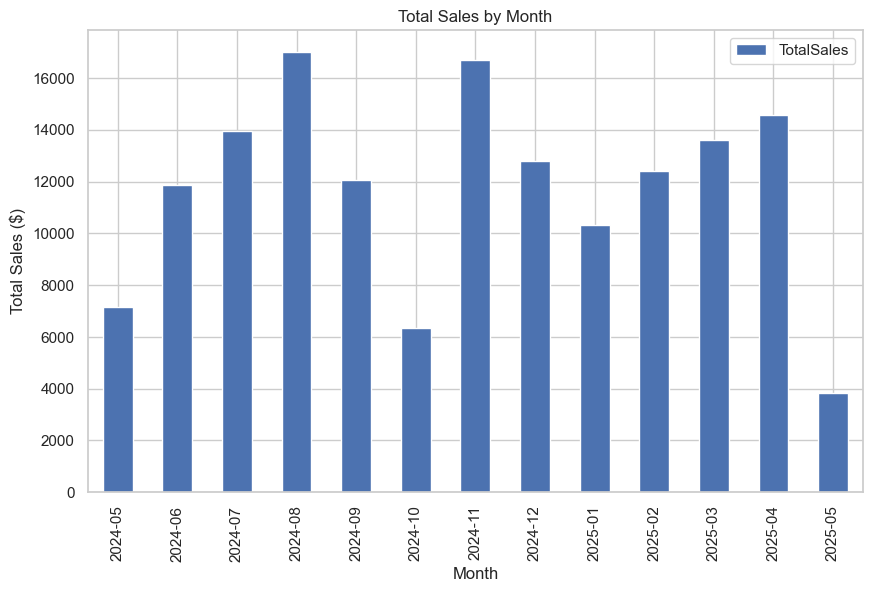

In [13]:
# Query: Total sales by month
query = """
SELECT strftime('%Y-%m', s.SaleDate) AS Month, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
GROUP BY Month
ORDER BY Month
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_monthly = pd.read_sql_query(query, conn)

# Display the results
print(df_monthly)

# Visualize the results
df_monthly.plot(kind="bar", x="Month", y="TotalSales", title="Total Sales by Month")
plt.ylabel("Total Sales ($)")
plt.show()

  Quarter  TotalSales
0      Q1    36357.36
1      Q2    37421.96
2      Q3    43044.77
3      Q4    35835.13


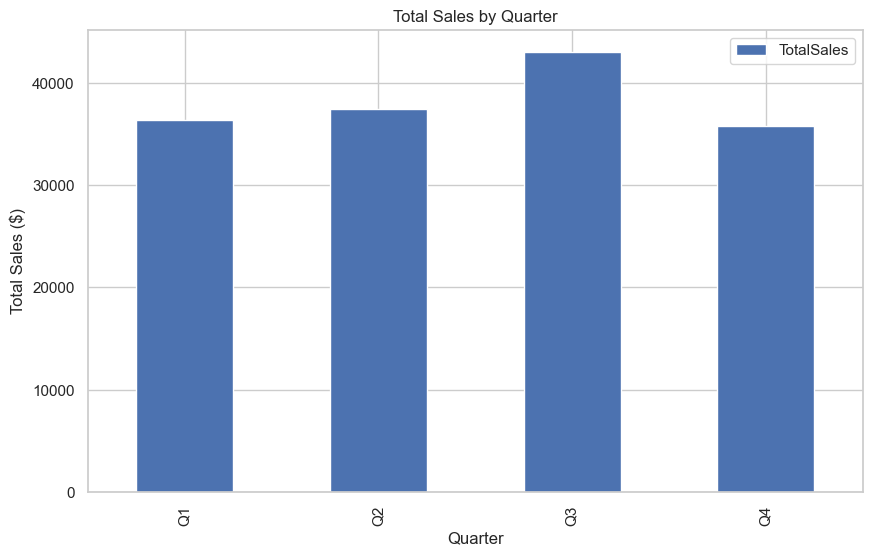

In [14]:
# Query: Total sales by quarter
query = """
SELECT 
    CASE 
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 1 AND 3 THEN 'Q1'
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 4 AND 6 THEN 'Q2'
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 7 AND 9 THEN 'Q3'
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 10 AND 12 THEN 'Q4'
    END AS Quarter,
    SUM(s.TotalAmount) AS TotalSales
FROM Sales s
GROUP BY Quarter
ORDER BY Quarter
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_quarterly = pd.read_sql_query(query, conn)

# Display the results
print(df_quarterly)

# Visualize the results
df_quarterly.plot(kind="bar", x="Quarter", y="TotalSales", title="Total Sales by Quarter")
plt.ylabel("Total Sales ($)")
plt.show()

   DayOfWeek  TotalSales
0     Monday    30169.00
1    Tuesday    20083.58
2  Wednesday    23383.16
3   Thursday    17178.51
4     Friday    17838.63
5   Saturday    19045.77
6     Sunday    24960.57


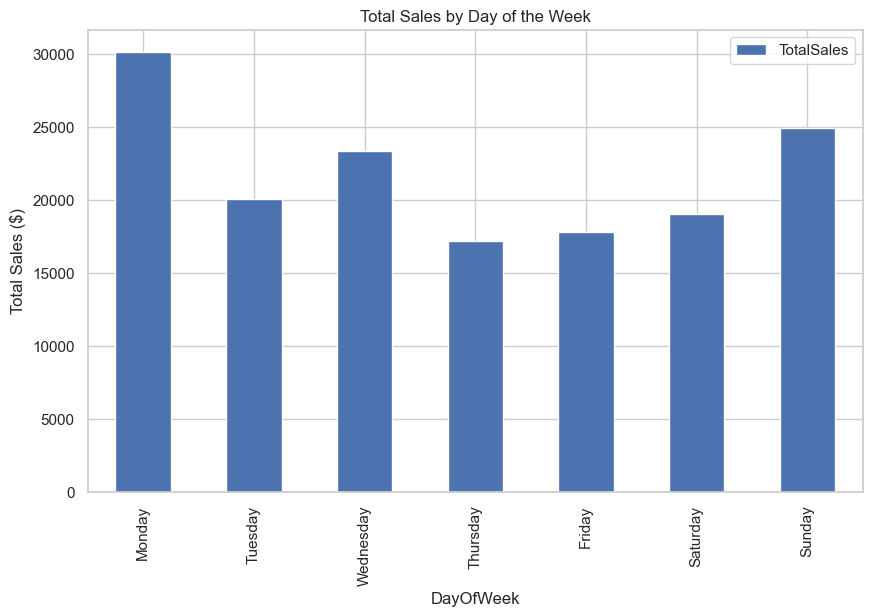

In [17]:
# Query: Total sales by day of the week (ordered Monday to Sunday)
query = """
SELECT 
    CASE strftime('%w', s.SaleDate)
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS DayOfWeek,
    SUM(s.TotalAmount) AS TotalSales
FROM Sales s
GROUP BY DayOfWeek
ORDER BY 
    CASE strftime('%w', s.SaleDate)
        WHEN '1' THEN 1
        WHEN '2' THEN 2
        WHEN '3' THEN 3
        WHEN '4' THEN 4
        WHEN '5' THEN 5
        WHEN '6' THEN 6
        WHEN '0' THEN 7
    END
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_weekly = pd.read_sql_query(query, conn)

# Display the results
print(df_weekly)

# Visualize the results
df_weekly.plot(kind="bar", x="DayOfWeek", y="TotalSales", title="Total Sales by Day of the Week")
plt.ylabel("Total Sales ($)")
plt.show()

      SaleDate  DailySales  Rolling7DaySales
0   2024-05-08      698.02               NaN
1   2024-05-12      100.48               NaN
2   2024-05-13     1261.34               NaN
3   2024-05-16      202.44               NaN
4   2024-05-17      976.40               NaN
..         ...         ...               ...
272 2025-05-03      453.67           2316.11
273 2025-05-04      457.63           2732.86
274 2025-05-05     1654.02           3888.16
275 2025-05-06      424.78           4032.27
276 2025-05-08      674.40           4397.97

[277 rows x 3 columns]


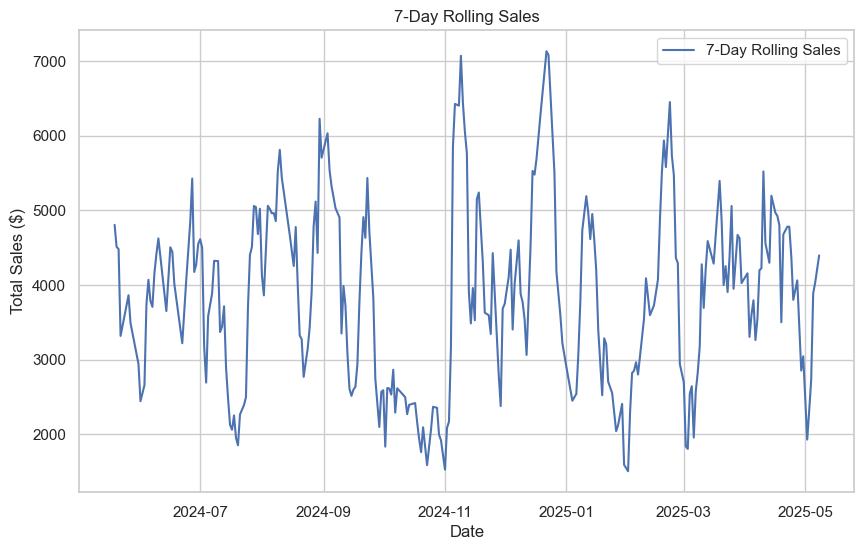

In [16]:
# Query: Daily sales
query = """
SELECT s.SaleDate, SUM(s.TotalAmount) AS DailySales
FROM Sales s
GROUP BY s.SaleDate
ORDER BY s.SaleDate
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_daily = pd.read_sql_query(query, conn)

# Convert SaleDate to datetime
df_daily['SaleDate'] = pd.to_datetime(df_daily['SaleDate'])

# Calculate rolling 7-day sales
df_daily['Rolling7DaySales'] = df_daily['DailySales'].rolling(window=7).sum()

# Display the results
print(df_daily)

# Visualize the results
plt.plot(df_daily['SaleDate'], df_daily['Rolling7DaySales'], label="7-Day Rolling Sales")
plt.title("7-Day Rolling Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.legend()
plt.show()